___
# Ciência dos Dados - PROJETO 1

## Gabriel Heusi Pereira Bueno de Camargo

## Título
O comportamento da segurança alimentar no território brasileiro.

___
## Introdução

A diversidade do território brasileiro se apresenta em diversos fatores, entre eles há um negativo que deve ser destacado: a insegurança alimentar, ou melhor, a segurança alimentar restrita para uma parcela baixa da população. A partir disso buscou-se realizar uma análise de como isso se comporta, observando a diferença entre as regiões, entre a zona urbana e rural e ainda um destaque para a distribuição desse problema de acordo com a renda familiar. Dessa forma com auxílio de uma ferramenta do IBGE, a PNAD, os dados serão analisados e explicados ao longo da análise para então uma conclusão ao final. Vale destacar ainda que será tratado com a base de dados de 2009 e 2013, a última divulgada que involve questões de âmbito alimentar. A orientação do projeto como um todo vai ao encontro de responder a seguinte pergunta sobre segurança alimentar: ao comparar as pesquisas de 2009 e 2013, qual é a faixa de renda familiar em que se concentra maior número de pessoas que já passaram por situação de insegurança alimentar? A comparação será feita apenas para as 2 regiões que demonstram maior disparidade desse problema entre zona rural e urbana. 

In [175]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from numpy import zeros_like

In [176]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Gabriel Camargo\Documents\Insper - Engenharia\Ciência dos Dados\PNAD DOM2013\DOM2013csv


In [177]:
base = pd.read_csv('DOM2013.csv',sep=',')
base9 = pd.read_csv('DOM2009.csv',sep=',')

## MUDANÇA DA VARIÁVEL INICIAL QUE MOSTRA O ANO DE PESQUISA.

In [178]:
base.V0101=base.V0101.astype("int")
base9.V0101=base9.V0101.astype("int")

## DEFINIÇÃO DAS REGIÕES E TRANSFORMAÇÃO EM UMA CATEGORIA;

In [179]:
base.loc[(base.UF<18),"REGIAO"]="NORTE"
base.loc[(base.UF>20)&(base.UF<30),"REGIAO"]="NORDESTE"
base.loc[(base.UF>30)&(base.UF<36),"REGIAO"]="SUDESTE"
base.loc[(base.UF>35)&(base.UF<44),"REGIAO"]="SUL"
base.loc[(base.UF>43)&(base.UF<54),"REGIAO"]="CENTRO-OESTE"
base.REGIAO=base.REGIAO.astype("category")

In [180]:
base9.loc[(base9.UF<18),"REGIAO"]="NORTE"
base9.loc[(base9.UF>20)&(base9.UF<30),"REGIAO"]="NORDESTE"
base9.loc[(base9.UF>30)&(base9.UF<36),"REGIAO"]="SUDESTE"
base9.loc[(base9.UF>35)&(base9.UF<44),"REGIAO"]="SUL"
base9.loc[(base9.UF>43)&(base9.UF<54),"REGIAO"]="CENTRO-OESTE"
base9.REGIAO=base9.REGIAO.astype("category")

## DIVISÃO EM ZONA RURAL E URBANA, A SEGUNDA VARIÁVEL DE ANÁLISE

In [181]:
base.loc[(base.V4105<4),"ZONA"]="Urbana"
base.loc[(base.V4105>3),"ZONA"]="Rural"
base.ZONA=base.ZONA.astype("category")

In [182]:
base9.loc[(base9.V4105<4),"ZONA"]="Urbana"
base9.loc[(base9.V4105>3),"ZONA"]="Rural"
base9.ZONA=base9.ZONA.astype("category")

# CRIACÃO DA VARIÁVEL INSEGURANÇA ALIMENTAR:
A SEGUIR MODIFICA-SE AS VARIÁVEIS (PERGUNTAS SOBRE INSEGURANÇA ALIMENTAR) CRIANDO UMA ÚNICA CHAMADA "INSEGURANÇA ALIMENTAR". O MOTIVO PARA ISSO É QUE AS 4 PERGUNTAS FEITAS REPRESENTAM SITUAÇÕES DE DIFICULDADE PARA SE ALIMENTAR, PORTANTO PARA SE CONSIDERAR UMA PESSOA QUE PASSOU POR SITUAÇÃO DE DIFICULDADE ALIMENTAR DEVE SE TER PELO MENOS UMA PERGUNTA RESPONDIDA COM "SIM". HÁ AINDA A CARACTERIZACAO PARA CATEGORIA DAS 4 PERGUNTAS.

In [183]:
base.loc[(base.V2103==1) | (base.V2105==1) | (base.V2107==1) | (base.V2109==1),'Insegurança_Alimentar'] = 'Sim'
base.loc[(base.V2103==3) & (base.V2105==3) & (base.V2107==3) & (base.V2109==3),'Insegurança_Alimentar'] = 'Não'
base.V2103=base.V2103.astype("category")
base.V2105=base.V2105.astype("category")
base.V2107=base.V2107.astype("category")
base.V2109=base.V2109.astype("category")

In [184]:
base9.loc[(base9.V2103==1) | (base9.V2105==1) | (base9.V2107==1) | (base9.V2109==1),'Insegurança_Alimentar'] = 'Sim'
base9.loc[(base9.V2103==3) & (base9.V2105==3) & (base9.V2107==3) & (base9.V2109==3),'Insegurança_Alimentar'] = 'Não'
base9.V2103=base9.V2103.astype("category")
base9.V2105=base9.V2105.astype("category")
base9.V2107=base9.V2107.astype("category")
base9.V2109=base9.V2109.astype("category")

## CRIAÇÃO DO "PROBLEMA ALIMENTAR":
EM SEQUÊNCIA HÁ MAIS 4 PERGUNTAS DESTINADAS APENAS ÀQUELES QUE APRESENTARAM INSEGURANÇA ALIMENTAR. PORTANTO UTILIZOU-SE O MESMO
PROCESSO DO QUADRO ACIMA. ESSAS PERGUNTAS REFLETEM ALGUNS PROBLEMAS PELOS QUAIS AS PESSOAS PODERIAM TER PASSADO CASO RESPONDESSEM PELO MENOS UM SIM NAS 4 PERGUNTAS INICIAIS.

In [185]:
base.loc[(base.V2113==1) | (base.V2115==1) | (base.V2117==1) | (base.V2121==1),'Problema_Alimentar'] = 'Sim'
base.loc[(base.V2113==3) & (base.V2115==3) & (base.V2117==3) & (base.V2121==3),'Problema_Alimentar'] = 'Não'
base.V2113=base.V2113.astype("category")
base.V2115=base.V2115.astype("category")
base.V2117=base.V2117.astype("category")
base.V2121=base.V2121.astype("category")

In [186]:
base9.loc[(base9.V2111==1) | (base9.V2113==1) | (base9.V2115==1) | (base9.V2117==1) | (base9.V2119==1) | (base9.V2120==1) | (base9.V2121==1),'Problema_Alimentar'] = 'Sim'
base9.loc[(base9.V2111==3) & (base9.V2113==3) & (base9.V2115==3) & (base9.V2117==3) & (base9.V2119==3) & (base9.V2120==3) & (base9.V2121==3),'Problema_Alimentar'] = 'Não'
base9.V2113=base9.V2113.astype("category")
base9.V2115=base9.V2115.astype("category")
base9.V2117=base9.V2117.astype("category")
base9.V2117=base9.V2119.astype("category")
base9.V2121=base9.V2120.astype("category")
base9.V2121=base9.V2121.astype("category")

## FILTRAGEM INICIAL:
TRANSFORMACÃO DAS SIGLAS EM NOME DAS VARIÁVEIS DE INTERESSE E POSTERIOR FILTRO PARA RETIRAR PESSOAS QUE NAO RESPONDERAM (NaN)
AS 4 PERGUNTAS INICAIS E RENDA. VALE DESTACAR QUE NAO SE UTILIZOU PARA A VARIÁVEL "PROBLEMA_ALIMENTAR" POIS AQUELES QUE NÃO 
TIVERAM INSEGURANÇA ALIMENTAR NÃO FORAM CHEGARAM A SER QUESTIONADOS SOBRE E PORTANTO PERDERIA-SE DADOS.

In [187]:
base=base.loc[:,["V0101","REGIAO","ZONA","V4614",'Insegurança_Alimentar',"Problema_Alimentar"]]
base.columns=["ANO","REGIAO","ZONA","RENDA",'Insegurança_Alimentar',"Problema_Alimentar"]
base=base.dropna(subset=["RENDA","Insegurança_Alimentar"])
base

,ANO,REGIAO,ZONA,RENDA,Insegurança_Alimentar,Problema_Alimentar
2,2013,NORTE,Urbana,3.500000e+02,Não,NaN
3,2013,NORTE,Urbana,6.780000e+02,Não,NaN
4,2013,NORTE,Urbana,8.000000e+02,Não,NaN
5,2013,NORTE,Urbana,8.000000e+02,Não,NaN
6,2013,NORTE,Urbana,1.234000e+03,Não,NaN
7,2013,NORTE,Urbana,4.000000e+03,Não,NaN
8,2013,NORTE,Urbana,3.500000e+03,Não,NaN
9,2013,NORTE,Urbana,1.300000e+03,Não,NaN
10,2013,NORTE,Urbana,1.400000e+03,Sim,Não
11,2013,NORTE,Urbana,1.000000e+03,Não,NaN


## TABELA 1 - 2013

In [188]:
writer = pd.ExcelWriter('Tabela1-2013.xlsx',engine='xlsxwriter')
base.to_excel(writer,sheet_name="Projeto_1")
writer.save()

In [189]:
base9=base9.loc[:,["V0101","REGIAO","ZONA","V4614",'Insegurança_Alimentar',"Problema_Alimentar"]]
base9.columns=["ANO","REGIAO","ZONA","RENDA",'Insegurança_Alimentar',"Problema_Alimentar"]
base9=base9.dropna(subset=["RENDA","Insegurança_Alimentar"])
base9

,ANO,REGIAO,ZONA,RENDA,Insegurança_Alimentar,Problema_Alimentar
2,2009,NORTE,Urbana,8.280000e+02,Sim,Sim
3,2009,NORTE,Urbana,3.160000e+03,Não,NaN
4,2009,NORTE,Urbana,9.300000e+02,Não,NaN
6,2009,NORTE,Urbana,4.650000e+02,Não,NaN
7,2009,NORTE,Urbana,9.940000e+02,Não,NaN
8,2009,NORTE,Urbana,2.950000e+02,Sim,Sim
9,2009,NORTE,Urbana,6.512000e+03,Sim,NaN
10,2009,NORTE,Urbana,5.260000e+02,Sim,Sim
12,2009,NORTE,Urbana,1.242000e+03,Não,NaN
13,2009,NORTE,Urbana,0.000000e+00,Não,NaN


## TABELA 1 - 2009

In [190]:
writer = pd.ExcelWriter('Tabela1-2009.xlsx',engine='xlsxwriter')
base9.to_excel(writer,sheet_name="Projeto_1")
writer.save()

## PRIMEIRA OBSERVAÇÃO:
OCORRÊNCIA DE PESSOAS QUE JÁ PASSARAM POR SITUAÇÕES DE INSEGURANÇA ALIMENTAR ("Sim") PARA POSTERIORMENTE ANALISAR AINDA A DIFERENÇA ENTRE AS REGIÕES E ZONAS.

Não    76.2
Sim    23.8
Name: Insegurança_Alimentar, dtype: float64 



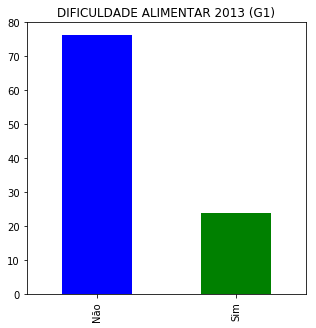

In [191]:
g1 = (base.Insegurança_Alimentar.value_counts(sort=False, normalize=True)*100).round(decimals=1)
plot = g1.plot(kind='bar',title='DIFICULDADE ALIMENTAR 2013 (G1)',figsize=(5, 5),color=('b','g'))
print(g1,"\n")

Não    68.3
Sim    31.7
Name: Insegurança_Alimentar, dtype: float64 



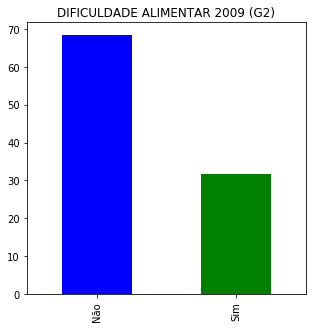

In [192]:
g2 = (base9.Insegurança_Alimentar.value_counts(sort=False, normalize=True)*100).round(decimals=1)
plot = g2.plot(kind='bar',title='DIFICULDADE ALIMENTAR 2009 (G2)',figsize=(5, 5),color=('b','g'))
print(g2,"\n")

## APROFUNDAMENTO NAS REGIÕES:
GRÁFICO DE FREQUÊNCIA SEGUIDO DE UMA TABELA QUE POTENCIALIZA A ANÁLISE DOS VALORES, JÁ QUE MOSTRA OS VALORES ABSOLUTOS E VISA BUSCAR MAIOR COMPREENSÃO E COERÊNCIA DOS VALORES.

INSEGURANÇA ALIMENTAR,Não,Sim,All
REGIÃO,,,
NORTE,10870,5886,16756
NORDESTE,20899,11470,32369
SUDESTE,30085,5313,35398
SUL,16760,2811,19571
CENTRO-OESTE,10233,2216,12449


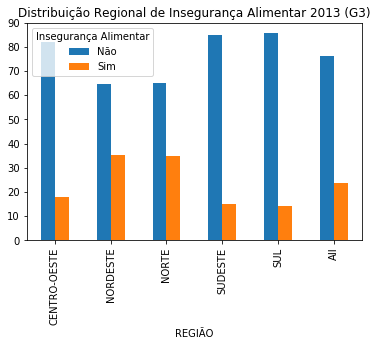

In [193]:
tb1= (pd.crosstab(base.REGIAO,base.Insegurança_Alimentar,margins=True,rownames=["REGIÃO"],colnames=["Insegurança Alimentar"],normalize='index')*100).round(decimals=1)
plot = tb1.plot(kind="bar",title="Distribuição Regional de Insegurança Alimentar 2013 (G3)")

abs1=pd.crosstab(base.REGIAO,base.Insegurança_Alimentar, margins=True, rownames=['REGIÃO'], colnames=['INSEGURANÇA ALIMENTAR'])
abs1=abs1.loc[['NORTE','NORDESTE','SUDESTE','SUL','CENTRO-OESTE']]
abs1

Nesse caso pode-se observar uma clara coerência entre os dados percentuais e absolutos, isso porque as regiões Norte e Nordeste mostram a maior frequência e número de pessoas que já passaram por situação de insegurança alimentar.

INSEGURANÇA ALIMENTAR,Não,Sim,All
REGIÃO,,,
NORTE,8570,5903,14473
NORDESTE,20348,16167,36515
SUDESTE,28235,8639,36874
SUL,15895,3722,19617
CENTRO-OESTE,9655,4029,13684


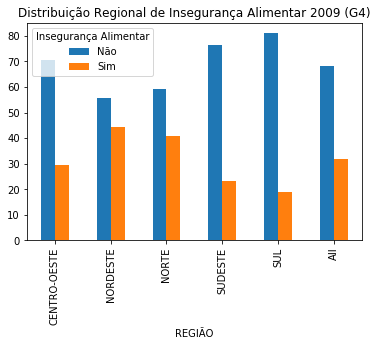

In [194]:
tb19= (pd.crosstab(base9.REGIAO,base9.Insegurança_Alimentar,margins=True,rownames=["REGIÃO"],colnames=["Insegurança Alimentar"],normalize='index')*100).round(decimals=1)
plot = tb19.plot(kind="bar",title="Distribuição Regional de Insegurança Alimentar 2009 (G4)")

abs19=pd.crosstab(base9.REGIAO,base9.Insegurança_Alimentar, margins=True, rownames=['REGIÃO'], colnames=['INSEGURANÇA ALIMENTAR'])
abs19=abs19.loc[['NORTE','NORDESTE','SUDESTE','SUL','CENTRO-OESTE']]
abs19

## OBSERVAÇÃO DA SITUAÇÃO NA ZONA URBANA E RURAL:
ASSIM COMO NA CELULA SUPERIOR, UM GRÁFICO INICIAL PERCENTUAL SEGUIDO DE UMA TABELA CONTENDO VALORES ABSOLUTOS QUE POSSIBILITAM OBSERVAR A DIFERENÇA ENTRE AS DUAS ZONAS

INSEGURANÇA ALIMENTAR,Não,Sim,All
ZONA,,,
Rural,10427,5745,16172
Urbana,78420,21951,100371


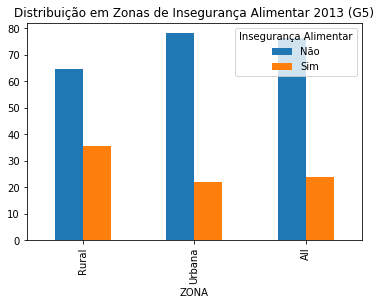

In [195]:
tb2 = (pd.crosstab(base.ZONA,base.Insegurança_Alimentar,margins=True,rownames=["ZONA"],colnames=["Insegurança Alimentar"],normalize='index')*100).round(decimals=1)
plot = tb2.plot(kind="bar",title="Distribuição em Zonas de Insegurança Alimentar 2013 (G5)")

abs2=pd.crosstab(base.ZONA,base.Insegurança_Alimentar, margins=True, rownames=['ZONA'], colnames=['INSEGURANÇA ALIMENTAR'])
abs2=abs2.loc[['Rural','Urbana']]
abs2


INSEGURANÇA ALIMENTAR,Não,Sim,All
ZONA,,,
Rural,11392,6251,17643
Urbana,71311,32209,103520


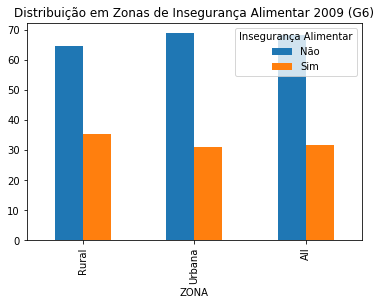

In [196]:
tb29 = (pd.crosstab(base9.ZONA,base9.Insegurança_Alimentar,margins=True,rownames=["ZONA"],colnames=["Insegurança Alimentar"],normalize='index')*100).round(decimals=1)
plot = tb29.plot(kind="bar",title="Distribuição em Zonas de Insegurança Alimentar 2009 (G6)")

abs29=pd.crosstab(base9.ZONA,base9.Insegurança_Alimentar, margins=True, rownames=['ZONA'], colnames=['INSEGURANÇA ALIMENTAR'])
abs29=abs29.loc[['Rural','Urbana']]
abs29


## CRUZAMENTO DE DADOS: 
SUB-DIVISÃO MAIS COMPLEXA, CADA ZONA DIVIDIDA POR ESTADO E A FREQUÊNCIA DE CADA UM DESSES, O OBJETIVO DESTE GRÁFICO É ANALISAR EM UMA ÚNICA IMAGEM AS DIFERENÇAS NOTÁVEIS ENTRE OS FATORES TERRITORIAIS ANALISADOS E ASSIM FOCAR DIRETAMENTE NAS REGIÕES QUE PRECISAM DA ANÁLISE PARA RESPONDER A PERGUNTA

Insegurança_Alimentar   Não   Sim
REGIAO       ZONA                
CENTRO-OESTE Rural     79.4  20.6
             Urbana    82.5  17.5
NORDESTE     Rural     50.4  49.6
             Urbana    68.2  31.8
NORTE        Rural     59.5  40.5
             Urbana    66.3  33.7
SUDESTE      Rural     83.5  16.5
             Urbana    85.1  14.9
SUL          Rural     85.1  14.9
             Urbana    85.7  14.3 



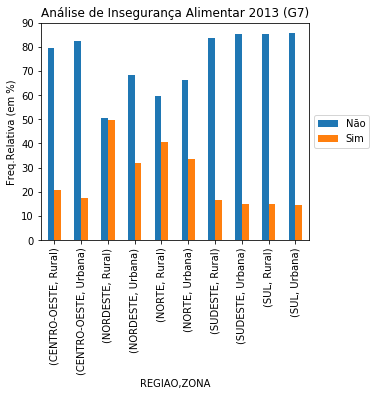

In [197]:
ct1=(pd.crosstab([base.REGIAO, base.ZONA],base.Insegurança_Alimentar, normalize='index')*100).round(decimals=1)
ct1
print(ct1,'\n')
plot = ct1.plot(kind='bar',title="Análise de Insegurança Alimentar 2013 (G7)")
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Freq.Relativa (em %)')
plt.show()

Insegurança_Alimentar   Não   Sim
REGIAO       ZONA                
CENTRO-OESTE Rural     79.1  20.9
             Urbana    69.4  30.6
NORDESTE     Rural     52.3  47.7
             Urbana    56.6  43.4
NORTE        Rural     57.4  42.6
             Urbana    59.7  40.3
SUDESTE      Rural     76.1  23.9
             Urbana    76.6  23.4
SUL          Rural     85.4  14.6
             Urbana    80.3  19.7 



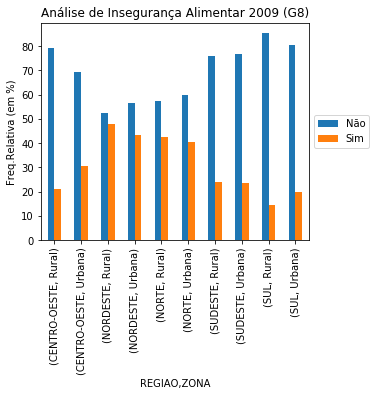

In [198]:
ct2=(pd.crosstab([base9.REGIAO, base9.ZONA],base9.Insegurança_Alimentar, normalize='index')*100).round(decimals=1)
ct2
print(ct2,'\n')
plot = ct2.plot(kind='bar',title="Análise de Insegurança Alimentar 2009 (G8)")
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Freq.Relativa (em %)')
plt.show()

## SEQUÊNCIA DE ANÁLISE PARA CADA ANO:
Observando os dois últimos gráficos pode-se perceber precisamente as duas regiões que apresentam maior disparidade entre zona urbana e rural. No caso de 2013 (1°gráfico) Norte e Nordeste são as duas regiões que serão analisadas a fim de responder a pergunta-guia do projeto, já na situação de 2009 apresenta-se o Centro-Oeste e o Nordeste. 

## ANÁLISE QUANTITATIVA:
OBSERVAR COMO SE COMPORTA A INSEGURANÇA ALIMENTAR DE ACORDO COM A RENDA FAMILIAR.
O PRIMEIRO HISTOGRAMA DEMONSTRA A FREQUÊNCIA ENTRE AQUELES QUE RESPONDERAM PELO MENOS UM "Sim" NAS 4 PERGUNTAS INICIAIS E SÃO CONSIDERADOS PORTANTO, EM INSEGURANÇA ALIMENTAR.

[0, 350)         9.4
[350, 700)      17.0
[700, 1050)     19.2
[1050, 1400)    14.9
[1400, 1750)    12.0
[1750, 2100)     8.0
[2100, 2450)     5.0
[2450, 2800)     3.3
[2800, 3150)     2.3
[3150, 3500)     2.2
[3500, 3850)     1.6
[3850, 4200)     1.3
[4200, 4550)     1.1
[4550, 4900)     0.5
[4900, 5250)     0.7
[5250, 5600)     0.4
[5600, 5950)     0.4
[5950, 6300)     0.2
[6300, 6650)     0.1
[6650, 7000)     0.2
Name: RENDA, dtype: float64 



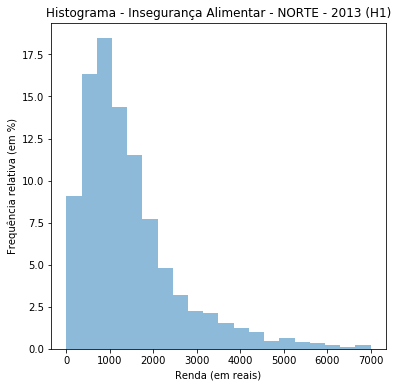

In [199]:
faixa = np.arange(0,7350,350)
frenda = pd.cut(base.RENDA[(base.Insegurança_Alimentar=='Sim')&(base.REGIAO=="NORTE")], bins=faixa, right=False)
t1 = (frenda.value_counts(sort=False, normalize=True)*100).round(decimals=1)
print(t1,"\n")

plot = base.RENDA[(base.Insegurança_Alimentar=='Sim')&(base.REGIAO=="NORTE")].plot.hist(bins=faixa,title="Histograma - Insegurança Alimentar - NORTE - 2013 (H1)", weights=zeros_like(base.RENDA[(base.Insegurança_Alimentar=='Sim')&(base.REGIAO=="NORTE")])+1./base.RENDA[(base.Insegurança_Alimentar=='Sim')&(base.REGIAO=="NORTE")].size*100, figsize=(6, 6), alpha=0.5)
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('Renda (em reais)')
plt.show()


[0, 350)        14.6
[350, 700)      20.1
[700, 1050)     20.7
[1050, 1400)    14.5
[1400, 1750)    10.7
[1750, 2100)     6.5
[2100, 2450)     4.0
[2450, 2800)     2.6
[2800, 3150)     1.8
[3150, 3500)     1.2
[3500, 3850)     0.9
[3850, 4200)     0.7
[4200, 4550)     0.3
[4550, 4900)     0.3
[4900, 5250)     0.4
[5250, 5600)     0.1
[5600, 5950)     0.2
[5950, 6300)     0.2
[6300, 6650)     0.1
[6650, 7000)     0.1
Name: RENDA, dtype: float64 



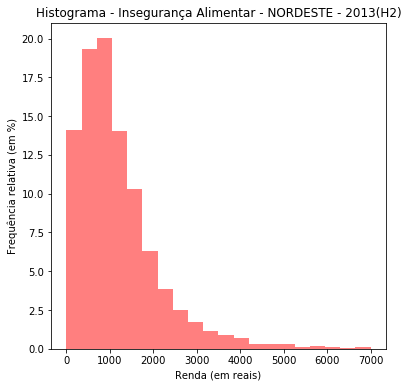

In [200]:
faixa = np.arange(0,7350,350)
frenda2 = pd.cut(base.RENDA[(base.Insegurança_Alimentar=='Sim')&(base.REGIAO=="NORDESTE")], bins=faixa, right=False)
t2 = (frenda2.value_counts(sort=False, normalize=True)*100).round(decimals=1)
print(t2,"\n")

plot = base.RENDA[(base.Insegurança_Alimentar=='Sim')&(base.REGIAO=="NORDESTE")].plot.hist(bins=faixa,title="Histograma - Insegurança Alimentar - NORDESTE - 2013(H2)", weights=zeros_like(base.RENDA[(base.Insegurança_Alimentar=='Sim')&(base.REGIAO=="NORDESTE")])+1./base.RENDA[(base.Insegurança_Alimentar=='Sim')&(base.REGIAO=="NORDESTE")].size*100, figsize=(6, 6), alpha=0.5,color="red")
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('Renda (em reais)')
plt.show()

[0, 350)         9.0
[350, 700)      24.4
[700, 1050)     21.0
[1050, 1400)    15.5
[1400, 1750)     9.7
[1750, 2100)     6.9
[2100, 2450)     4.1
[2450, 2800)     2.5
[2800, 3150)     1.8
[3150, 3500)     1.3
[3500, 3850)     0.9
[3850, 4200)     0.9
[4200, 4550)     0.7
[4550, 4900)     0.3
[4900, 5250)     0.3
[5250, 5600)     0.1
[5600, 5950)     0.2
[5950, 6300)     0.2
[6300, 6650)     0.1
[6650, 7000)     0.0
Name: RENDA, dtype: float64 



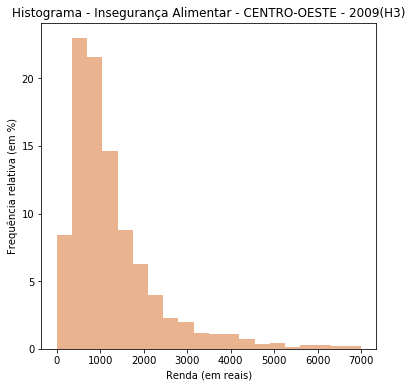

In [201]:
frenda9 = pd.cut(base9.RENDA[(base9.Insegurança_Alimentar=='Sim')&(base.REGIAO=="CENTRO-OESTE")], bins=faixa, right=False)
t19 = (frenda9.value_counts(sort=False, normalize=True)*100).round(decimals=1)
print(t19,"\n")

plot = base9.RENDA[(base9.Insegurança_Alimentar=='Sim')&(base9.REGIAO=="CENTRO-OESTE")].plot.hist(bins=faixa,title="Histograma - Insegurança Alimentar - CENTRO-OESTE - 2009(H3)", weights=zeros_like(base9.RENDA[(base9.Insegurança_Alimentar=='Sim')&(base9.REGIAO=="CENTRO-OESTE")])+1./base9.RENDA[(base9.Insegurança_Alimentar=='Sim')&(base9.REGIAO=="CENTRO-OESTE")].size*100, figsize=(6, 6), alpha=0.5,color="chocolate")
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('Renda (em reais)')
plt.show()

[0, 350)        19.9
[350, 700)      33.0
[700, 1050)     20.4
[1050, 1400)    11.1
[1400, 1750)     6.1
[1750, 2100)     3.4
[2100, 2450)     2.0
[2450, 2800)     1.0
[2800, 3150)     1.0
[3150, 3500)     0.5
[3500, 3850)     0.4
[3850, 4200)     0.3
[4200, 4550)     0.2
[4550, 4900)     0.1
[4900, 5250)     0.2
[5250, 5600)     0.1
[5600, 5950)     0.1
[5950, 6300)     0.1
[6300, 6650)     0.1
[6650, 7000)     0.0
Name: RENDA, dtype: float64 



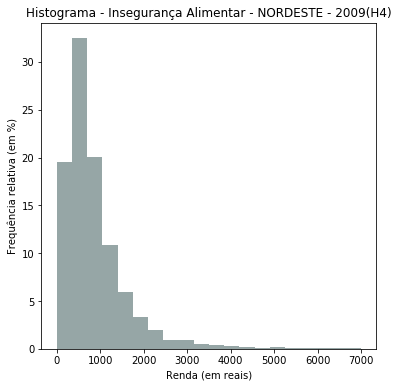

In [202]:
frenda29 = pd.cut(base9.RENDA[(base9.Insegurança_Alimentar=='Sim')&(base9.REGIAO=="NORDESTE")], bins=faixa, right=False)
t29 = (frenda29.value_counts(sort=False, normalize=True)*100).round(decimals=1)
print(t29,"\n")

plot = base9.RENDA[(base9.Insegurança_Alimentar=='Sim')&(base9.REGIAO=="NORDESTE")].plot.hist(bins=faixa,title="Histograma - Insegurança Alimentar - NORDESTE - 2009(H4)", weights=zeros_like(base9.RENDA[(base9.Insegurança_Alimentar=='Sim')&(base9.REGIAO=="NORDESTE")])+1./base9.RENDA[(base9.Insegurança_Alimentar=='Sim')&(base9.REGIAO=="NORDESTE")].size*100, figsize=(6, 6), alpha=0.5,color="darkslategray")
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('Renda (em reais)')
plt.show()

## ANÁLISE INICIAL E NOVA FILTRAGEM:
COM A PRECISÃO DOS VALORES MOSTRADOS ACIMA, PODE-SE OBSERVAR ONDE HÁ MAIOR CONCENTRAÇÃO EM CADA UMA DAS REGIÕES DE INTERESSE DE ACORDO COM A DISPARIDADE ANALISADA ANTERIORAMENTE NOS GRÁFICOS. DESSA FORMA A PARTIR DE AGORA A ANÁLISE SE CENTRARÁ APENAS ÀQUELES QUE PASSARAM POR SITUACÃO DE INSEGURANÇA ABRINDO PARA UMA NOVA VARIÁVEL, CHAMADA DE PROBLEMA ALIMENTAR E PAUTADA EM PERGUNTAS QUE DEMONSTRAM FALTA DE COMIDA OU ALIMENTAÇÃO RESTRITA POR CONTA DE FALTA DE DINHEIRO.

In [203]:
base=base[(base.Insegurança_Alimentar=="Sim")]
base

,ANO,REGIAO,ZONA,RENDA,Insegurança_Alimentar,Problema_Alimentar
10,2013,NORTE,Urbana,1.400000e+03,Sim,Não
53,2013,NORTE,Urbana,0.000000e+00,Sim,Não
60,2013,NORTE,Urbana,1.134000e+03,Sim,Não
61,2013,NORTE,Urbana,5.000000e+02,Sim,Não
80,2013,NORTE,Urbana,2.134000e+03,Sim,Sim
81,2013,NORTE,Urbana,6.780000e+02,Sim,Sim
91,2013,NORTE,Urbana,1.020000e+02,Sim,Não
93,2013,NORTE,Urbana,1.878000e+03,Sim,Não
94,2013,NORTE,Urbana,1.000000e+12,Sim,Não
95,2013,NORTE,Urbana,1.300000e+03,Sim,Não


## TABELA 2 - 2013

In [204]:
writer = pd.ExcelWriter('Tabela2-2013.xlsx',engine='xlsxwriter')
base.to_excel(writer,sheet_name="Projeto_1")
writer.save()

In [205]:
base9=base9[(base9.Insegurança_Alimentar=="Sim")]
base9

,ANO,REGIAO,ZONA,RENDA,Insegurança_Alimentar,Problema_Alimentar
2,2009,NORTE,Urbana,8.280000e+02,Sim,Sim
8,2009,NORTE,Urbana,2.950000e+02,Sim,Sim
9,2009,NORTE,Urbana,6.512000e+03,Sim,NaN
10,2009,NORTE,Urbana,5.260000e+02,Sim,Sim
14,2009,NORTE,Urbana,5.000000e+02,Sim,Sim
19,2009,NORTE,Urbana,3.350000e+02,Sim,Sim
25,2009,NORTE,Urbana,1.730000e+03,Sim,Sim
27,2009,NORTE,Urbana,3.500000e+02,Sim,Sim
29,2009,NORTE,Urbana,9.200000e+01,Sim,NaN
30,2009,NORTE,Urbana,7.000000e+02,Sim,Sim


## TABELA 2 - 2009

In [206]:
writer = pd.ExcelWriter('Tabela2-2009.xlsx',engine='xlsxwriter')
base9.to_excel(writer,sheet_name="Projeto_1")
writer.save()

### Caracterização dos problemas alimentares:
Os próximos gráficos tem como objetivo avaliar, além do comportamento da variável "problema alimentar" de acordo com a renda mensal familiar comparar com a distribuição de "insegurança alimentar" ou seja se a distribuição analisada anteriormente se mantém de certa maneira nessa variável que por sinal é dependente da inicial, "insegurança alimentar".

[0, 350)        12.7
[350, 700)      20.6
[700, 1050)     21.0
[1050, 1400)    14.9
[1400, 1750)    11.3
[1750, 2100)     6.6
[2100, 2450)     3.9
[2450, 2800)     2.5
[2800, 3150)     1.8
[3150, 3500)     1.7
[3500, 3850)     1.0
[3850, 4200)     0.4
[4200, 4550)     0.6
[4550, 4900)     0.2
[4900, 5250)     0.4
[5250, 5600)     0.2
[5600, 5950)     0.1
[5950, 6300)     0.1
[6300, 6650)     0.0
[6650, 7000)     0.0
Name: RENDA, dtype: float64 



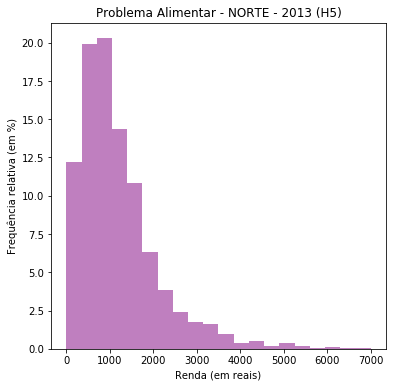

In [207]:
frenda3 = pd.cut(base.RENDA[(base.Problema_Alimentar=='Sim')&(base.REGIAO=="NORTE")], bins=faixa, right=False)
t3 = (frenda3.value_counts(sort=False, normalize=True)*100).round(decimals=1)
print(t3,"\n")

plot = base.RENDA[(base.Problema_Alimentar=='Sim')&(base.REGIAO=="NORTE")].plot.hist(bins=faixa,title="Problema Alimentar - NORTE - 2013 (H5)", weights=zeros_like(base.RENDA[(base.Problema_Alimentar=='Sim')&(base.REGIAO=="NORTE")])+1./base.RENDA[(base.Problema_Alimentar=='Sim')&(base.REGIAO=="NORTE")].size*100, figsize=(6, 6), alpha=0.5,color="purple")
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('Renda (em reais)')
plt.show()

[0, 350)        21.1
[350, 700)      22.3
[700, 1050)     21.8
[1050, 1400)    13.1
[1400, 1750)     8.7
[1750, 2100)     5.1
[2100, 2450)     2.9
[2450, 2800)     1.5
[2800, 3150)     1.1
[3150, 3500)     0.7
[3500, 3850)     0.6
[3850, 4200)     0.4
[4200, 4550)     0.3
[4550, 4900)     0.2
[4900, 5250)     0.1
[5250, 5600)     0.1
[5600, 5950)     0.0
[5950, 6300)     0.0
[6300, 6650)     0.0
[6650, 7000)     0.0
Name: RENDA, dtype: float64 



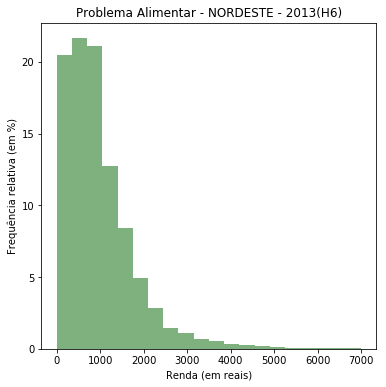

In [208]:
frenda4 = pd.cut(base.RENDA[(base.Problema_Alimentar=='Sim')&(base.REGIAO=="NORDESTE")], bins=faixa, right=False)
t4 = (frenda4.value_counts(sort=False, normalize=True)*100).round(decimals=1)
print(t4,"\n")

plot = base.RENDA[(base.Problema_Alimentar=='Sim')&(base.REGIAO=="NORDESTE")].plot.hist(bins=faixa,title="Problema Alimentar - NORDESTE - 2013(H6)", weights=zeros_like(base.RENDA[(base.Problema_Alimentar=='Sim')&(base.REGIAO=="NORDESTE")])+1./base.RENDA[(base.Problema_Alimentar=='Sim')&(base.REGIAO=="NORDESTE")].size*100, figsize=(6, 6), alpha=0.5,color="darkgreen")
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('Renda (em reais)')
plt.show()

[0, 350)        12.7
[350, 700)      26.2
[700, 1050)     22.2
[1050, 1400)    15.4
[1400, 1750)     6.8
[1750, 2100)     7.7
[2100, 2450)     3.2
[2450, 2800)     0.9
[2800, 3150)     1.8
[3150, 3500)     1.8
[3500, 3850)     0.0
[3850, 4200)     0.9
[4200, 4550)     0.5
[4550, 4900)     0.0
[4900, 5250)     0.0
[5250, 5600)     0.0
[5600, 5950)     0.0
[5950, 6300)     0.0
[6300, 6650)     0.0
[6650, 7000)     0.0
Name: RENDA, dtype: float64 



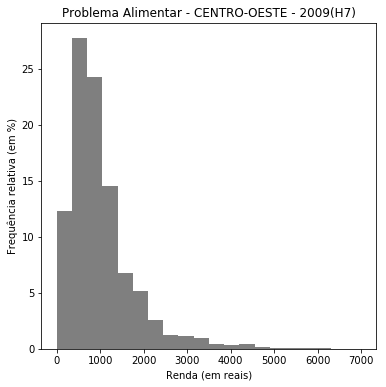

In [209]:
frenda39 = pd.cut(base9.RENDA[(base9.Problema_Alimentar=='Sim')&(base.REGIAO=="CENTRO-OESTE")], bins=faixa, right=False)
t39 = (frenda39.value_counts(sort=False, normalize=True)*100).round(decimals=1)
print(t39,"\n")

plot = base9.RENDA[(base9.Problema_Alimentar=='Sim')&(base9.REGIAO=="CENTRO-OESTE")].plot.hist(bins=faixa,title="Problema Alimentar - CENTRO-OESTE - 2009(H7)", weights=zeros_like(base9.RENDA[(base9.Problema_Alimentar=='Sim')&(base9.REGIAO=="CENTRO-OESTE")])+1./base9.RENDA[(base9.Problema_Alimentar=='Sim')&(base9.REGIAO=="CENTRO-OESTE")].size*100, figsize=(6, 6), alpha=0.5,color="black")
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('Renda (em reais)')
plt.show()

[0, 350)        12.7
[350, 700)      26.2
[700, 1050)     22.2
[1050, 1400)    15.4
[1400, 1750)     6.8
[1750, 2100)     7.7
[2100, 2450)     3.2
[2450, 2800)     0.9
[2800, 3150)     1.8
[3150, 3500)     1.8
[3500, 3850)     0.0
[3850, 4200)     0.9
[4200, 4550)     0.5
[4550, 4900)     0.0
[4900, 5250)     0.0
[5250, 5600)     0.0
[5600, 5950)     0.0
[5950, 6300)     0.0
[6300, 6650)     0.0
[6650, 7000)     0.0
Name: RENDA, dtype: float64 



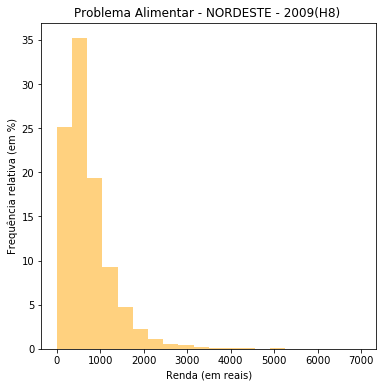

In [210]:
frenda49 = pd.cut(base9.RENDA[(base9.Problema_Alimentar=='Sim')&(base.REGIAO=="CENTRO-OESTE")], bins=faixa, right=False)
t49 = (frenda49.value_counts(sort=False, normalize=True)*100).round(decimals=1)
print(t49,"\n")

plot = base9.RENDA[(base9.Problema_Alimentar=='Sim')&(base9.REGIAO=="NORDESTE")].plot.hist(bins=faixa,title="Problema Alimentar - NORDESTE - 2009(H8) ", weights=zeros_like(base9.RENDA[(base9.Problema_Alimentar=='Sim')&(base9.REGIAO=="NORDESTE")])+1./base9.RENDA[(base9.Problema_Alimentar=='Sim')&(base9.REGIAO=="NORDESTE")].size*100, figsize=(6, 6), alpha=0.5,color="orange")
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('Renda (em reais)')
plt.show()

Em comparação com os primeiros histogramas pode-se dizer que se mantém o ideal da distribuição, ou seja os primeiros 4 intervalos (350 cada) concentram a maior parte das pessoas que já passaram por alguma situação de insegurança alimentar e também apresentaram algum tipo de problema com alimentação.

## Conclusão 

       Inicialmente deve-se destacar que as variáveis selecionadas foram apenas aquelas que existem nos 2 anos de pesquisa para que assim houvesse maior coerência no momento de comparação. Em termos de efeito conclusivo é válido observar primeiramente uma melhora percentual nos números de insegurança alimentar no país, os primeiros gráficos (G1 E G2) mostram isso a ponto de que em 2009 31,7% da população já havia passado por alguma situação de insegurança alimentar e 2013 mostrou que 23,8% apresentou essa falta de segurança. 
        Em termos direcionados a pergunta-guia, o gráfico G3 já apresenta as regiões com maiores problemas quanto à insegurança alimentar e coincidentemente as mesmas que apresentam a maior divergência nos valores entre zona urbana e rural, lembrando que trata-se dos dados de 2013. Em relação a 2009, G4 nâo apresenta grande coerência entre os dois tipos de valores, porém o Nordeste já se mostra em destaque negativo pelos altíssimos números. Partindo disso deve-se partir para o foco diretamente, os gráficos G7 e G8 apresentam enfim as duas regiões de cada análise, primeiramente Norte e Nordeste, como já dito anteriormente, no ano de 2013, e Centro-Oeste e Nordeste em 2009. A partir daí vale observar os histogramas relacionados àqueles que tiveram insegurança alimentar de acordo com a renda mensal familiar, sendo assim H1,H2,H3 e H4 apresentam um certo padrão de concentração dos entrevistados nas 4 primeiras faixas de renda, sendo um intervalo de 350 entre cada uma. Isso mostra que basicamente a população mais pobre com rendas até aproximadamente 1500 sofrem mais com falta de alimentos nessas regiões de análise, que retomando apresentam maior disparidade entre zona urbana e rural para insegurança e segurança alimentar.
        Com o aprofundamento das questões, partiu-se para "Problema Alimentar" que pode ser descrito como problemas relacionados a falta de comida ou alimentação restrita devido basicamente a falta de capacidade monetária, e novamente pode-se observar uma concentração na margem esquerda (menor renda familiar), ou seja isso mostra que apesar de uma melhora ao longo dos 4 anos entre as duas pesquisas manteve-se um padrão negativo nas regiões, apesar do centro-oeste ter melhorado seus valores percentuais a região Norte se mostrou em decadência e "tomou" esse lugar no que se observou em 2013 tanto para "problema" quanto "insegurança" alimentar.
        Há uma possível demonstração de que as áreas centrais ainda se mostrem mais desenvolvidas e cada vez mais distantes de regiões periféricas, primeiro que na maioria dos casos observados a região urbana apresentava maiores problemas percentuais para acesso a alimentação e as próprias regiões de maior problema nessa questão, a manutenção do Nordeste e a passagem do Centro-Oeste justamente para outra região mais distante do centro desenvolvido do país, o Norte.